In [85]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import datetime as dt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

### Import Dataset

In [86]:
data = pd.read_csv("covid.csv")
data.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

### Filter dataset

In [87]:
df = data.drop(['Country_code', 'WHO_region'], axis=1)
df["Date_reported"] = pd.to_datetime(df["Date_reported"])
df["Date_reported"] = df["Date_reported"].map(dt.datetime.toordinal)
df.isna().sum()

Date_reported        0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [88]:
df['Current_death'] = df['New_cases'] - df['New_deaths']
df.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Current_death
0,737427,Afghanistan,0,0,0,0,0
1,737428,Afghanistan,0,0,0,0,0
2,737429,Afghanistan,0,0,0,0,0
3,737430,Afghanistan,0,0,0,0,0
4,737431,Afghanistan,0,0,0,0,0


### Select Australia as the country

In [89]:
au_case = df[df["Country"]=="Australia"]
au_case.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Current_death
15477,737427,Australia,0,0,0,0,0
15478,737428,Australia,0,0,0,0,0
15479,737429,Australia,0,0,0,0,0
15480,737430,Australia,0,0,0,0,0
15481,737431,Australia,0,0,0,0,0


### Plot for New Case , New Death & Current Death

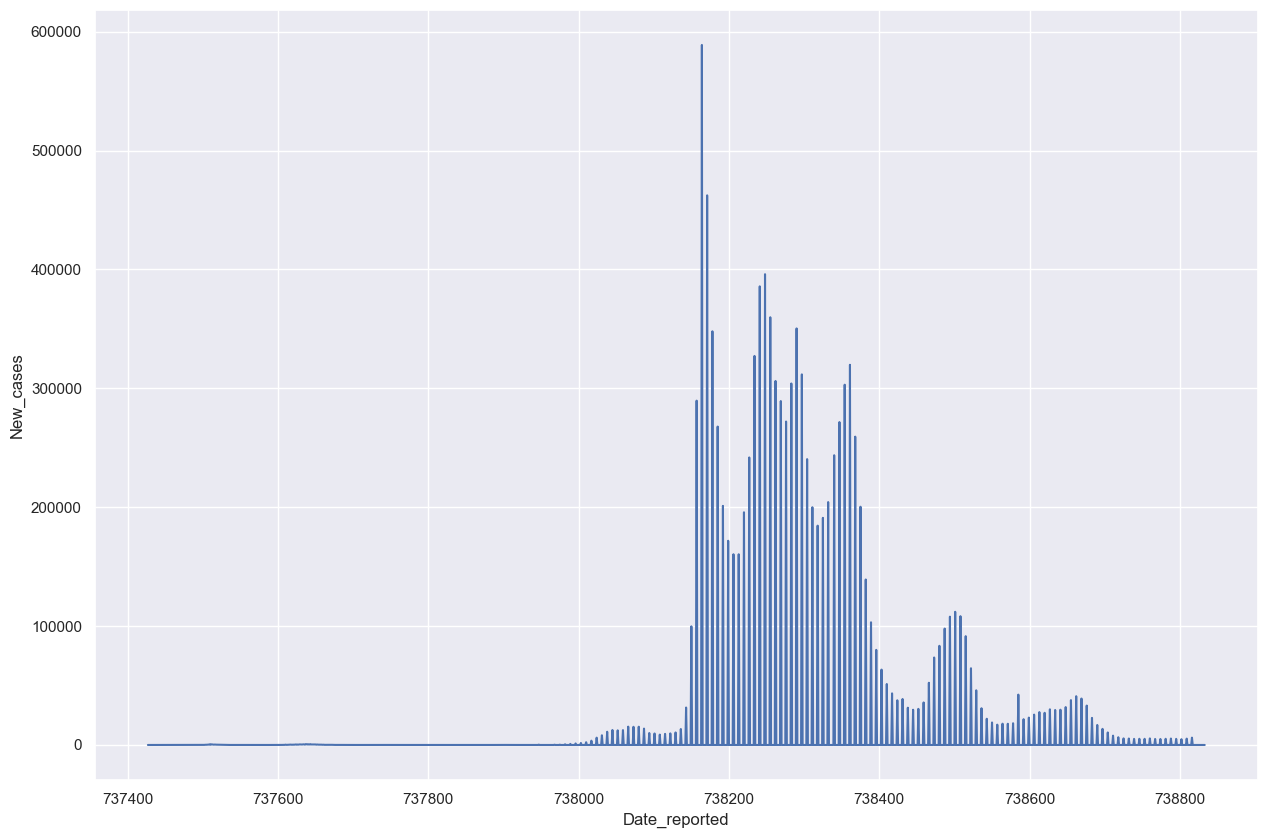

In [90]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date_reported" , y="New_cases" , data=au_case)
plt.show()

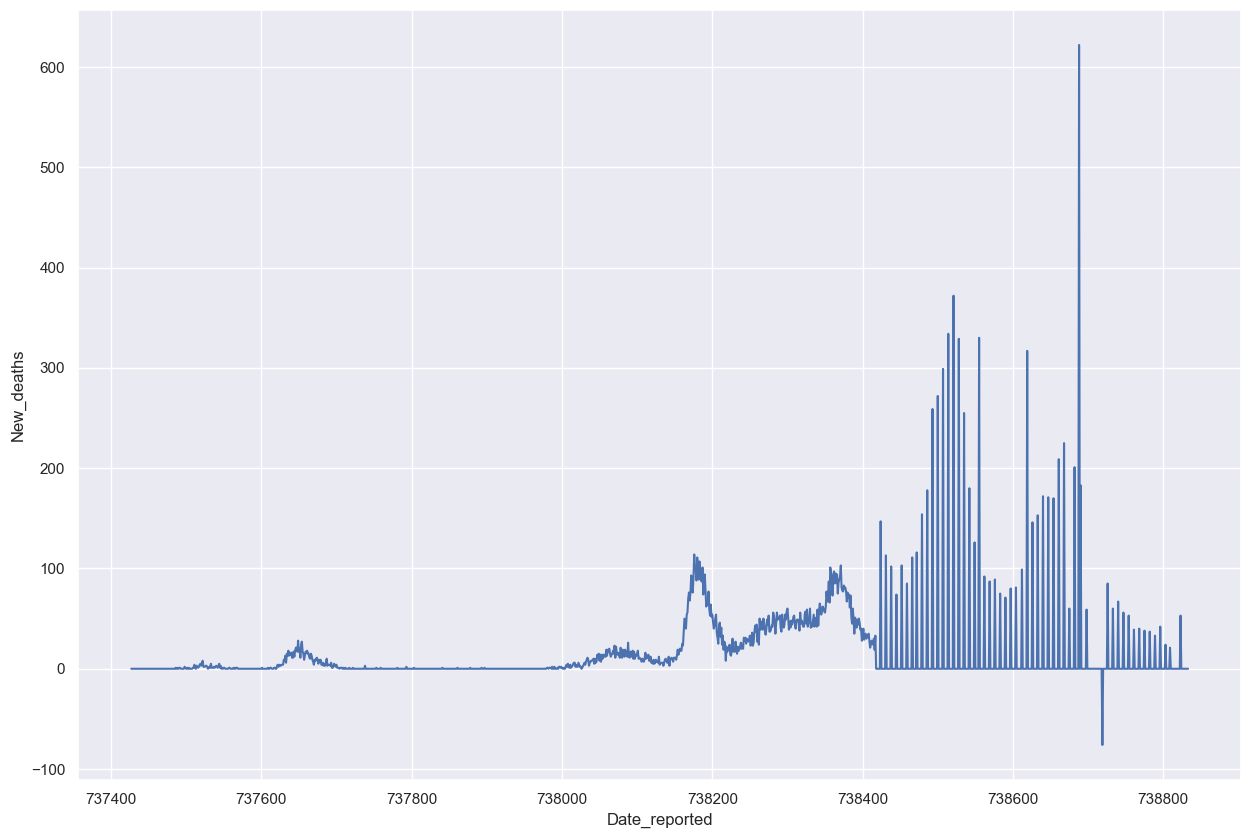

In [91]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date_reported" , y="New_deaths" , data=au_case)
plt.show()

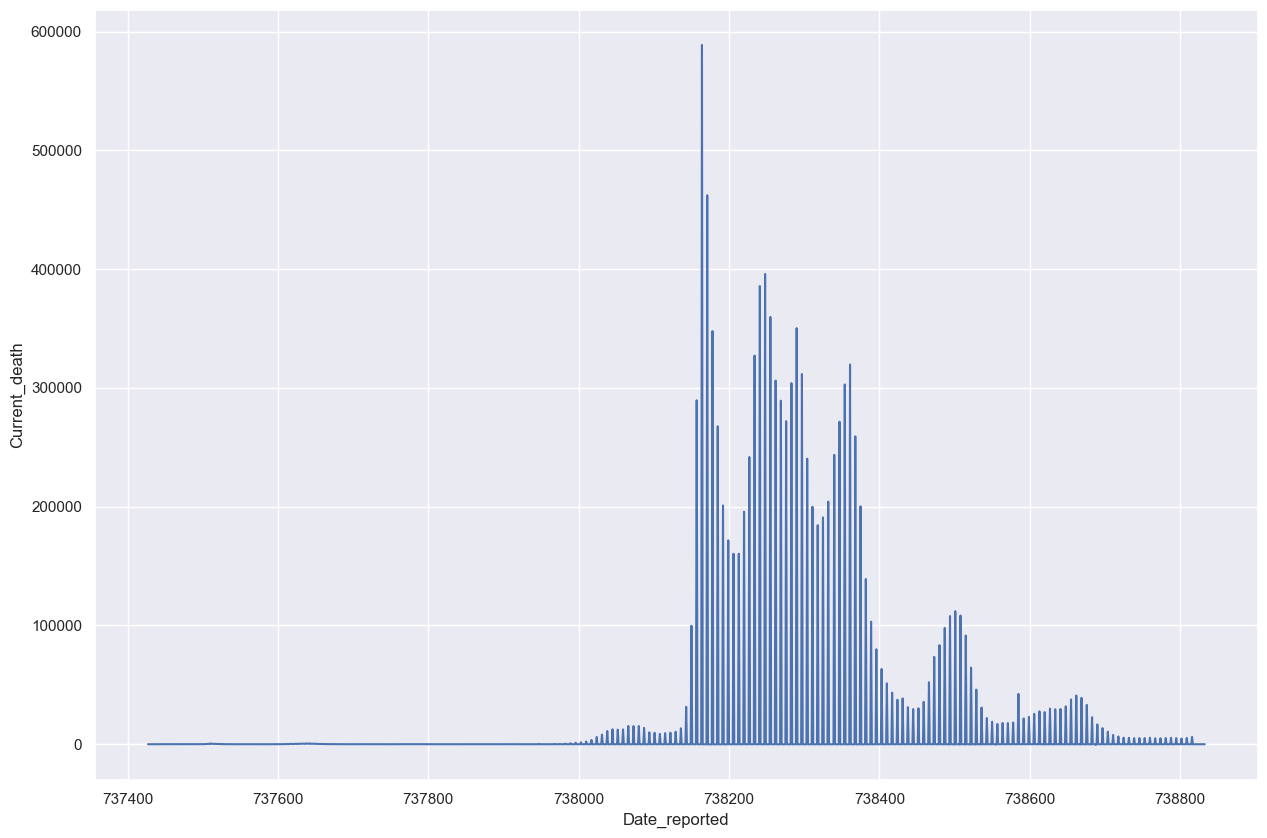

In [92]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date_reported" , y="Current_death" , data=au_case)
plt.show()

### Model Training and tuning parameters

In [93]:
X = np.array(au_case[['New_cases','New_deaths','Current_death','Cumulative_cases','Cumulative_deaths']])
X.shape

(1407, 5)

In [94]:
y = np.array(au_case[['Date_reported']])
y.shape

(1407, 1)

In [95]:
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.5 ,  random_state=42)

print ("\n\n ----------------- X train & test shape -----------------")
print(X_train.shape , X_test.shape)
print ("\n\n ----------------- Y train & test shape -----------------")
print(X_train.shape , X_test.shape)



 ----------------- X train & test shape -----------------
(703, 5) (704, 5)


 ----------------- Y train & test shape -----------------
(703, 5) (704, 5)


### All models definations

In [96]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# models = [LogisticRegression(max_iter=2000),SVC(kernel='linear'), KNeighborsClassifier() , RandomForestClassifier()]
# def compare_models_train_test():
#     for model in models:
#         model.fit(X_train, y_train.ravel())
#         test_data_prediction = model.predict(X_test)
#         accuracy = accuracy_score(y_test , test_data_prediction)
#         print(f'Accuracy score of the  -  {model} = {accuracy}')
# compare_models_train_test()
        

### Logistic Regression Cross Validation

In [98]:
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)
lr_scores = cross_val_score(lr_model, X_train, y_train , scoring="r2", cv=10)
lr_predict = cross_val_predict(lr_model , X_test, y_test)
lr_score_test = cross_val_score(lr_model , X_test , y_test , cv=10)

print ("\n\n ----------------- Logistic Regression Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(lr_scores)}')
print(f'Test Accuracy -  {np.mean(lr_score_test)}')



 ----------------- Logistic Regression Model -----------------
##############################################################

Train Accuracy -  0.8638843144369789
Test Accuracy -  0.8639561827922255


### Random Forest Cross Validation

In [114]:
k = 10
kf_10 = KFold(n_splits = k, random_state = 24, shuffle=True)
rfc_model = RandomForestClassifier(class_weight='balanced',max_depth=5,max_features='sqrt',n_estimators=300,random_state=24)
rfc_model.fit(X_train, y_train.ravel())
y_pred = rfc_model.predict(X_test)
rfc_f1_CV = f1_score(y_test, y_pred , average='micro')

y_pred_test = rfc_model.predict(X_test)
rfc_f1_test = f1_score(y_test, y_pred_test,average='micro')

print ("\n\n ----------------- Random Forest Model -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {rfc_f1_CV}')
print(f'Test Accuracy -  {rfc_f1_test}')



 ----------------- Random Forest Model -----------------
##############################################################

Train Accuracy -  0.0
Test Accuracy -  0.0
